# **PACE Stages**: **The Project Framework**

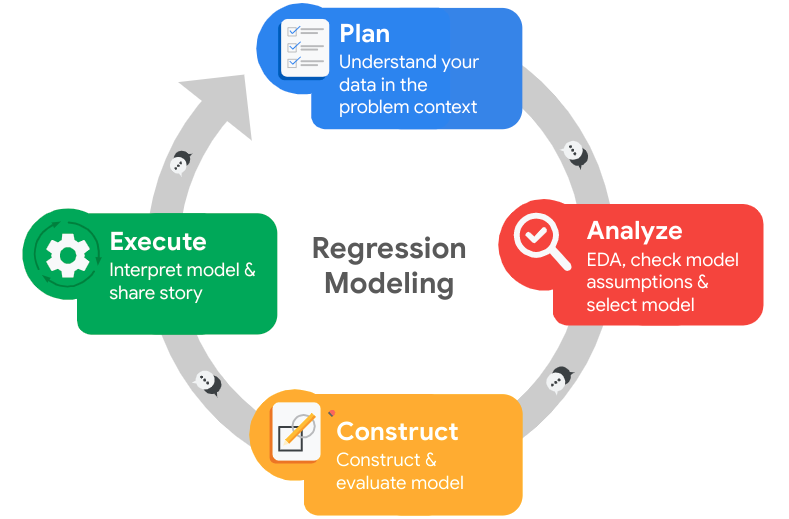

# Pace: Plan Stage

## **Estimating Taxi Fares for Riders in advance:**

1. **Project goal:**

In this fictional scenario, the New York City Taxi and Limousine Commission (TLC) has approached the data consulting firm Automatidata to develop an app that enables TLC riders to estimate the taxi fares in advance of their ride.

2. **Background:**

Since 1971, TLC has been regulating and overseeing the licensing of New York City's taxi cabs, for-hire vehicles, commuter vans, and paratransit vehicles.

3. **Scenario:**

New York City TLC stakeholders have been impressed with the data analytical work completed by the Automatidata team in this project. As a result, they have reached out once again for assistance in creating a machine learning model that can help predict the taxi fares for riders in advance.

## Step 1. Imports & Loading Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import date, datetime, timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn.metrics as metrics

from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv(r"D:\Google Advanced Data Analytics\Go Beyond the Numbers\Automatidata_EDA_Project\2017_Yellow_Taxi_Trip_Data.csv")
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 14:53,04/11/2017 15:19,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 13:17,05/07/2017 13:48,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


## Step 2. Data Exploration (Initial EDA and data cleaning)

### Gather basic information about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Gather descriptive statistics about the data

In [5]:
df.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,22699.0,NaN,NaN,NaN,56758486.171285,32744929.492148,12127.0,28520556.0,56731504.0,85374524.0,113486300.0
VendorID,22699.0,NaN,NaN,NaN,1.556236,0.496838,1.0,1.0,2.0,2.0,2.0
tpep_pickup_datetime,22699,22435,02/01/2017 21:08,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tpep_dropoff_datetime,22699,22451,11/08/2017 22:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,22699.0,NaN,NaN,NaN,1.642319,1.285231,0.0,1.0,1.0,2.0,6.0
trip_distance,22699.0,NaN,NaN,NaN,2.913313,3.653171,0.0,0.99,1.61,3.06,33.96
RatecodeID,22699.0,NaN,NaN,NaN,1.043394,0.708391,1.0,1.0,1.0,1.0,99.0
store_and_fwd_flag,22699,2,N,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULocationID,22699.0,NaN,NaN,NaN,162.412353,66.633373,1.0,114.0,162.0,233.0,265.0
DOLocationID,22699.0,NaN,NaN,NaN,161.527997,70.139691,1.0,112.0,162.0,233.0,265.0


### Check missing values

In [6]:
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

### Check duplicates

In [7]:
df.duplicated().sum()

0

# pAce: Analyze Stage

## Step 3. Data Exploration (Continue EDA)

### Convert pickup & dropoff columns to datetime

In [8]:
df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].dtypes

tpep_pickup_datetime     object
tpep_dropoff_datetime    object
dtype: object

In [9]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], format= 'mixed')
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"], format= 'mixed')

In [10]:
df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
dtype: object

### Create duration column

In [11]:
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]) / np.timedelta64(1, "m")
df["trip_duration"].describe()

count    22699.000000
mean        17.010830
std         61.996458
min        -17.000000
25%          6.750000
50%         11.000000
75%         18.258333
max       1440.000000
Name: trip_duration, dtype: float64

### Check outliers

In [12]:
round(df.describe(include= [np.number], percentiles= [.5]).T, 1)

,count,mean,std,min,50%,max
Unnamed: 0,22699.0,56758486.2,32744929.5,12127.0,56731504.0,113486300.0
VendorID,22699.0,1.6,0.5,1.0,2.0,2.0
passenger_count,22699.0,1.6,1.3,0.0,1.0,6.0
trip_distance,22699.0,2.9,3.7,0.0,1.6,34.0
RatecodeID,22699.0,1.0,0.7,1.0,1.0,99.0
PULocationID,22699.0,162.4,66.6,1.0,162.0,265.0
DOLocationID,22699.0,161.5,70.1,1.0,162.0,265.0
payment_type,22699.0,1.3,0.5,1.0,1.0,4.0
fare_amount,22699.0,13.0,13.2,-120.0,9.5,1000.0
extra,22699.0,0.3,0.5,-1.0,0.0,4.5


**From above description for numerical variables, we could observe outliers in:**
1. passenger_count
2. trip_distance
3. RatecodeID
4. fare_amount
5. extra
6. mta_tax
7. tip_amount
8. improvement_surcharge
9. total_amount
10. trip_duration

### Box Plots

In [13]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")

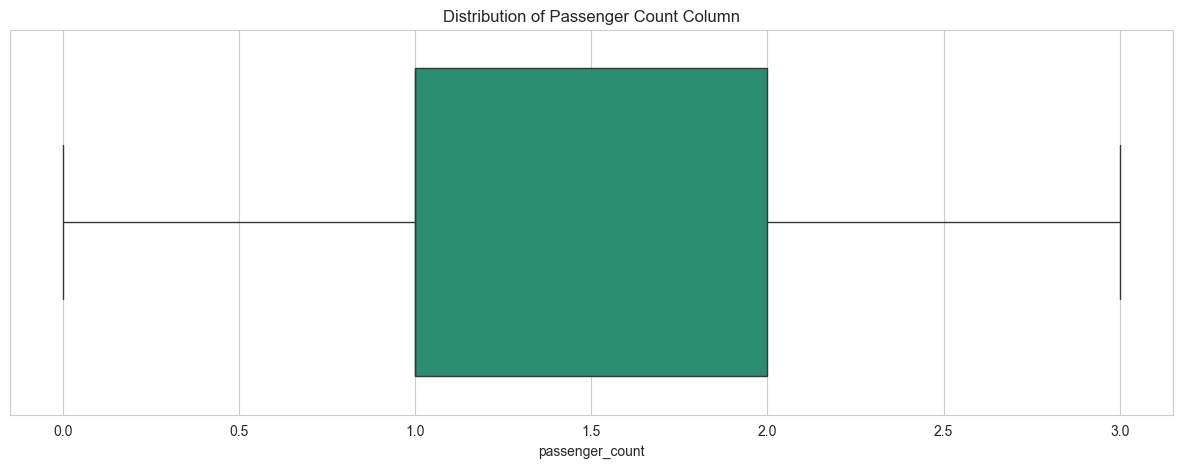

In [14]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "passenger_count", showfliers= False)
plt.title("Distribution of Passenger Count Column")
plt.show()

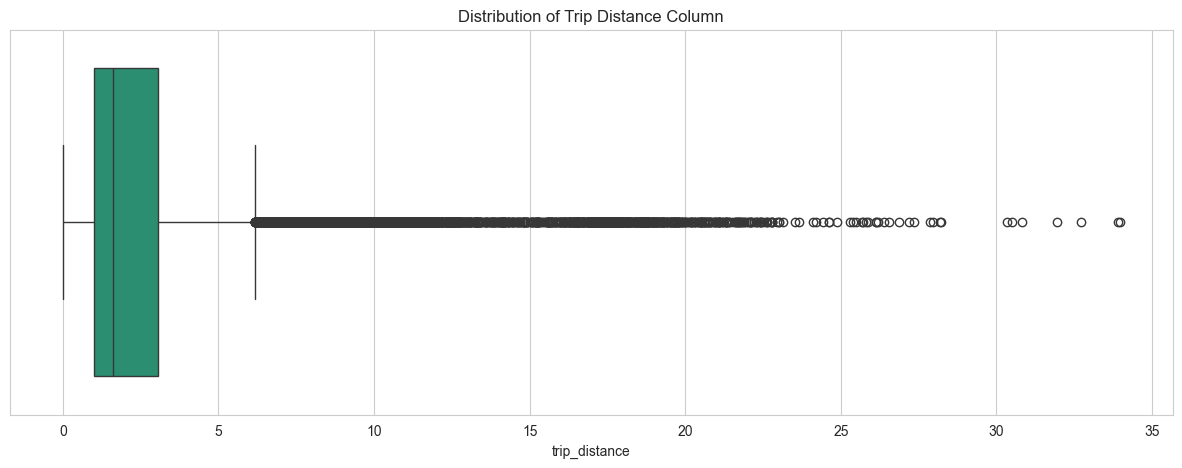

In [15]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "trip_distance", showfliers= True)
plt.title("Distribution of Trip Distance Column")
plt.show()

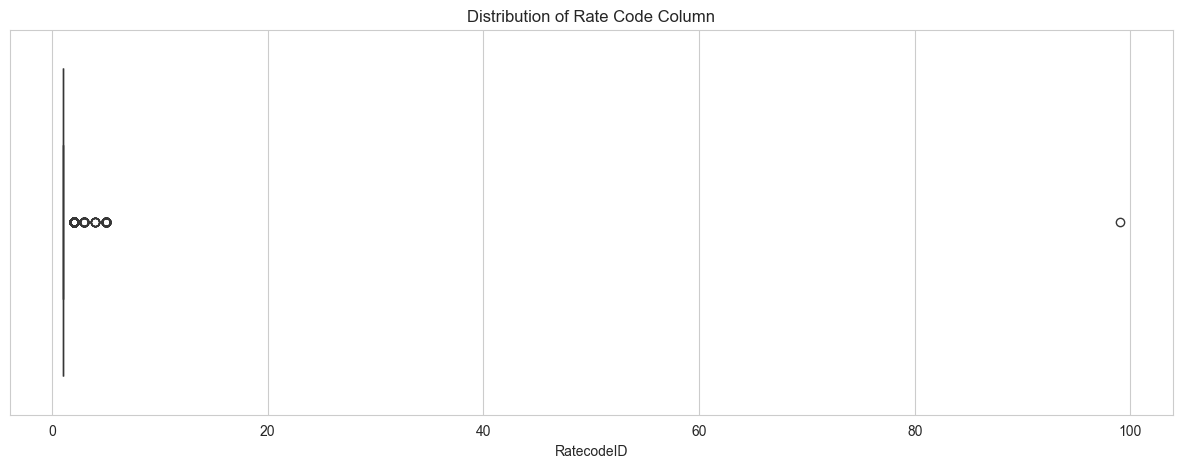

In [16]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "RatecodeID", showfliers= True)
plt.title("Distribution of Rate Code Column")
plt.show()

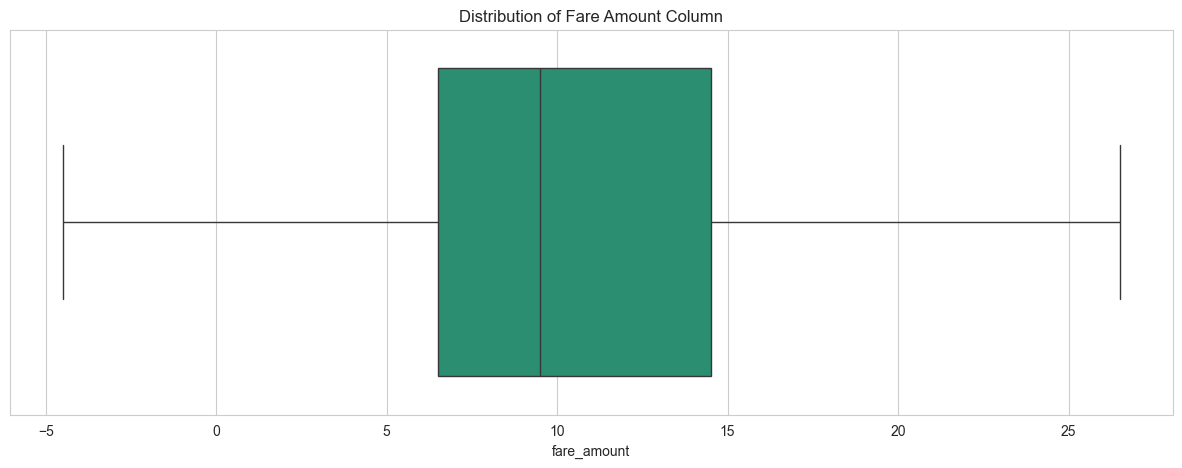

In [17]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "fare_amount", showfliers= False)
plt.title("Distribution of Fare Amount Column")
plt.show()

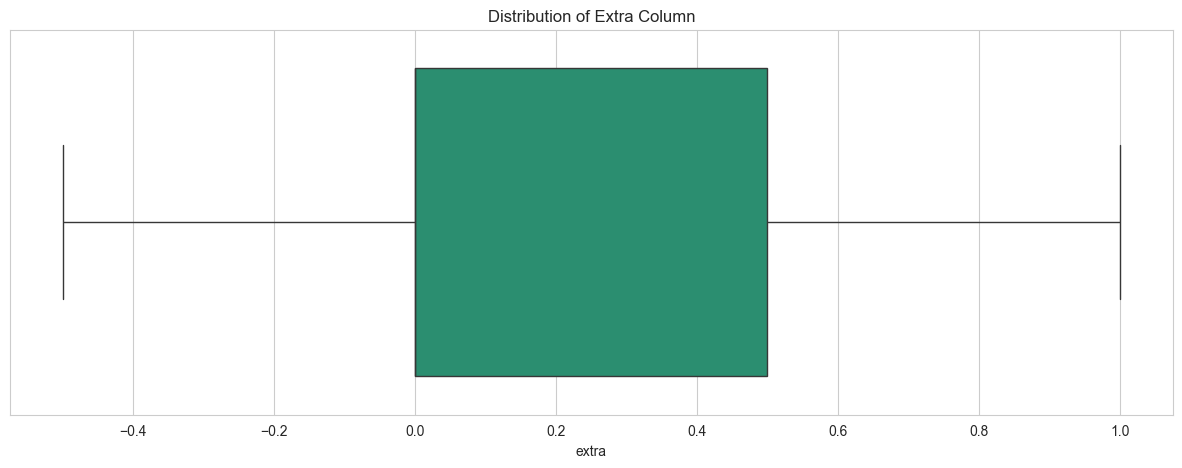

In [18]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "extra", showfliers= False)
plt.title("Distribution of Extra Column")
plt.show()

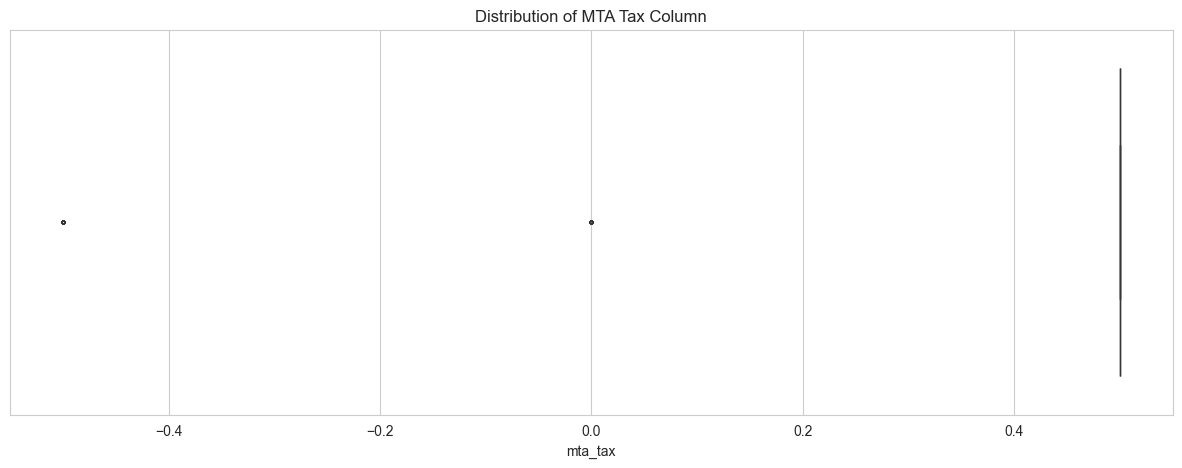

In [19]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "mta_tax", showfliers= True, fliersize= 2)
plt.title("Distribution of MTA Tax Column")
plt.show()

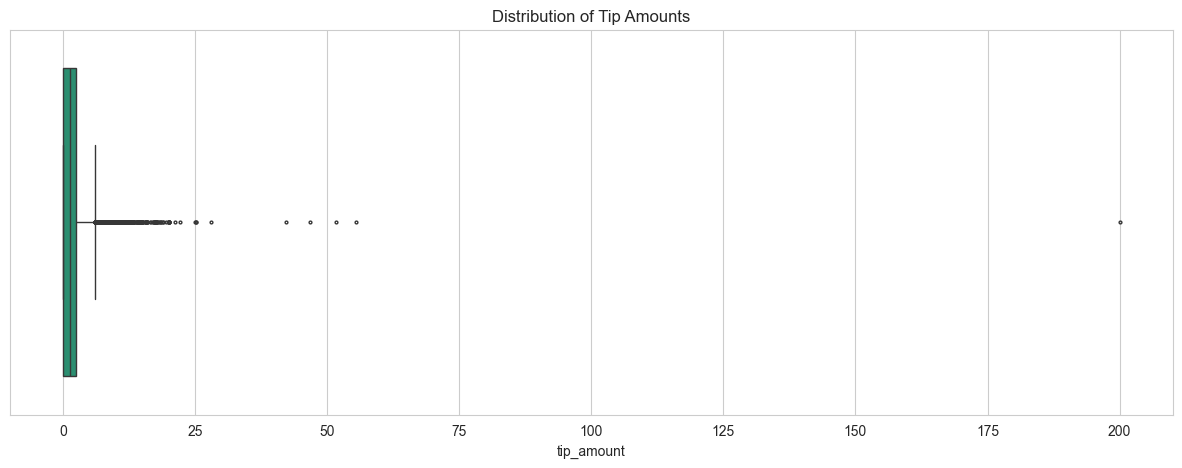

In [20]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "tip_amount", showfliers= True, fliersize= 2)
plt.title("Distribution of Tip Amounts")
plt.show()

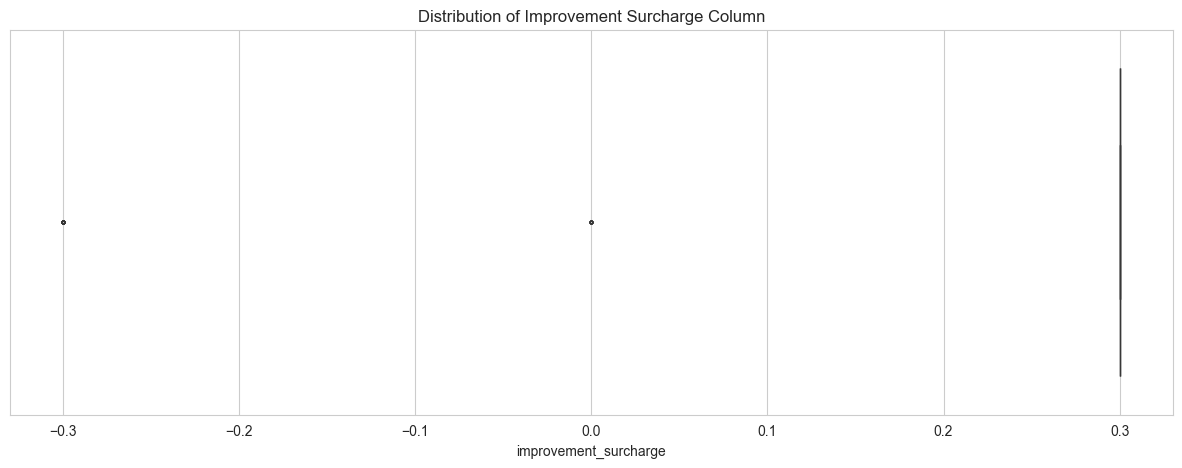

In [21]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "improvement_surcharge", showfliers= True, fliersize= 2)
plt.title("Distribution of Improvement Surcharge Column")
plt.show()

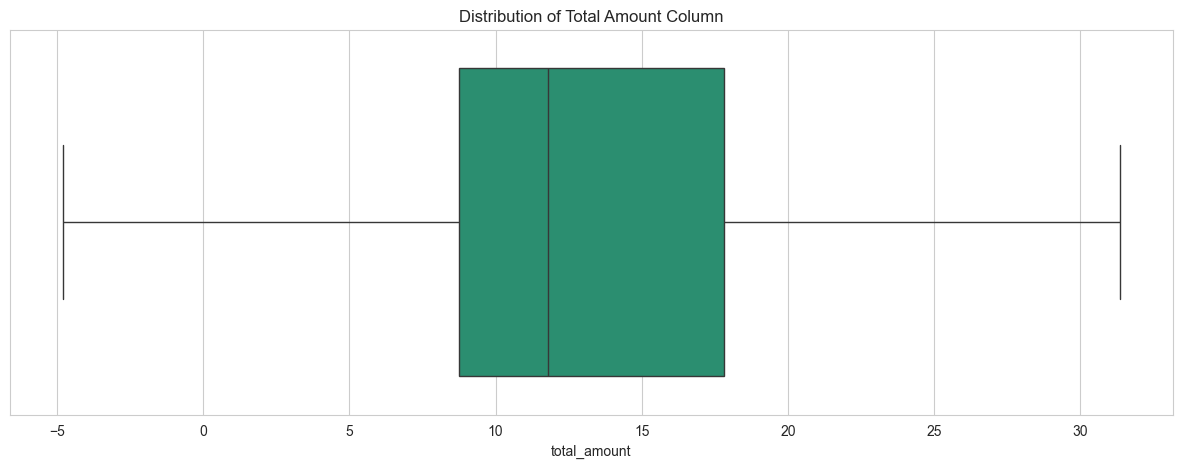

In [22]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "total_amount", showfliers= False)
plt.title("Distribution of Total Amount Column")
plt.show()

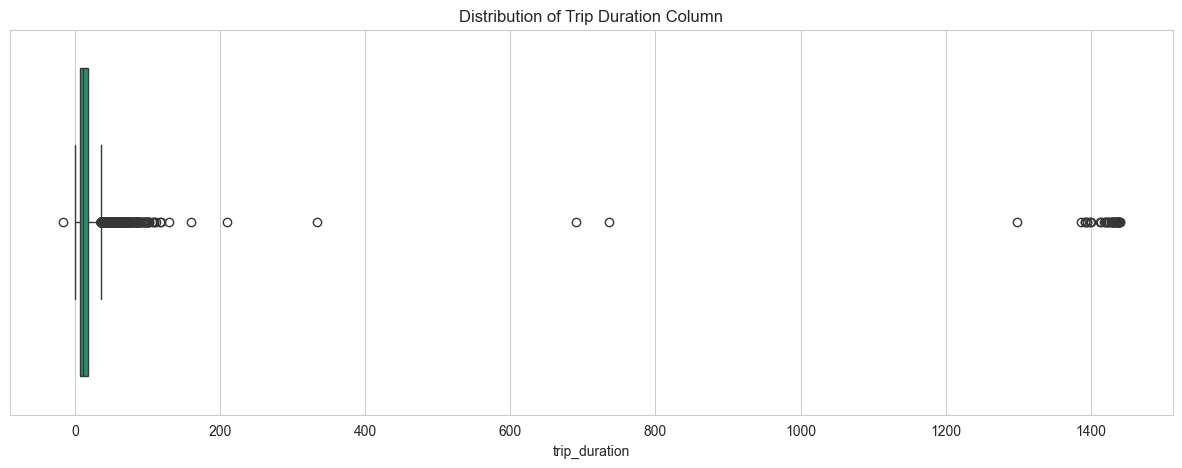

In [23]:
plt.figure(figsize = (15, 5))
sns.boxplot(data= df, x= "trip_duration", showfliers= True)
plt.title("Distribution of Trip Duration Column")
plt.show()

### Imputations

`passenger_count` imputation

In [24]:
df[["passenger_count"]].value_counts()

passenger_count
1                  16117
2                   3305
5                   1143
3                    953
6                    693
4                    455
0                     33
Name: count, dtype: int64

In [25]:
df.loc[df["passenger_count"] == 0, "passenger_count"] = 1

`RatecodeID` imputation

In [26]:
df[["RatecodeID"]].value_counts()

RatecodeID
1             22070
2               513
5                68
3                39
4                 8
99                1
Name: count, dtype: int64

In [27]:
df.loc[df["RatecodeID"] == 99, "RatecodeID"] = 3

`extra` imputation

In [28]:
df.loc[df["extra"] < 0, "extra"].count()

9

In [29]:
df.loc[df["extra"] < 0, "extra"] = 0

`mta_tax` imputation

In [30]:
df.loc[df["mta_tax"] < 0, "mta_tax"].count()

13

In [31]:
df.loc[df["mta_tax"] < 0, "mta_tax"] = 0

`tip_amount` imputation

In [32]:
df["tip_amount"].sort_values(ascending= False).head(5)

8476     200.00
6064      55.50
13861     51.64
12511     46.69
984       42.29
Name: tip_amount, dtype: float64

In [33]:
df.loc[df["tip_amount"] == 200, "tip_amount"] = 55.50

`improvement_surcharge` imputation

In [34]:
df.loc[df["improvement_surcharge"] < 0, "improvement_surcharge"].count()

14

In [35]:
df.loc[df["improvement_surcharge"] < 0, "improvement_surcharge"] = 0

In [36]:
def impute_outliers(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for column in column_list:
        # Reassign minimum to zero
        df.loc[df[column] < 0, column] = 0

        # Calculate upper threshold
        Q3 = df[column].quantile(.75)
        Q1 = df[column].quantile(.25)
        iqr = Q3 - Q1
        upper_limit = Q3 + (iqr_factor * iqr)
        print(column)
        print("Q3:", round(Q3, 3))
        print("Upper threshold:", round(upper_limit, 3))

        # Reassign values > threshold to threshold
        df.loc[df[column] > upper_limit, column] = upper_limit

`trip_distance` imputation

In [37]:
impute_outliers(["trip_distance"], 9)

trip_distance
Q3: 3.06
Upper threshold: 21.69


In [38]:
df["trip_distance"].describe()

count    22699.000000
mean         2.904191
std          3.598010
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         21.690000
Name: trip_distance, dtype: float64

`trip_duration` imputation

In [39]:
impute_outliers(["trip_duration"], 9)

trip_duration
Q3: 18.258
Upper threshold: 121.833


In [40]:
df["trip_duration"].describe()

count    22699.000000
mean        14.538892
std         12.546985
min          0.000000
25%          6.750000
50%         11.000000
75%         18.258333
max        121.833333
Name: trip_duration, dtype: float64

`fare_amount` imputation

In [41]:
impute_outliers(["fare_amount"], 9)

fare_amount
Q3: 14.5
Upper threshold: 86.5


In [42]:
df["fare_amount"].describe()

count    22699.000000
mean        12.944139
std         10.795620
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         86.500000
Name: fare_amount, dtype: float64

`total_amount` imputation

In [43]:
impute_outliers(["total_amount"], 9)

total_amount
Q3: 17.8
Upper threshold: 99.25


In [44]:
df["total_amount"].describe()

count    22699.000000
mean        16.210212
std         13.337089
min          0.000000
25%          8.750000
50%         11.800000
75%         17.800000
max         99.250000
Name: total_amount, dtype: float64

### Feature Engineering

In [45]:
# Create `pickup_dropoff` column
df["pickup_dropoff"] = df["PULocationID"].astype("str") + " >> " + df["DOLocationID"].astype("str")
df["pickup_dropoff"].head(5)

0    100 >> 231
1     186 >> 43
2    262 >> 236
3     188 >> 97
4      4 >> 112
Name: pickup_dropoff, dtype: object

In [46]:
df["pickup_dropoff"].describe()

count          22699
unique          4172
top       264 >> 264
freq             277
Name: pickup_dropoff, dtype: object

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

#### Create `mean_distance` column

In [47]:
grouped_pickup_dropoff = round(df.groupby(["pickup_dropoff"])[["trip_distance"]].mean(), 2)
grouped_pickup_dropoff.head(5)

,trip_distance
pickup_dropoff,
1 >> 1,2.43
10 >> 148,15.70
100 >> 1,16.89
100 >> 100,0.25
100 >> 107,1.18


In [48]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped_pickup_dropoff.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict["trip_distance"]

In [49]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df["mean_distance"] = df["pickup_dropoff"]

# 2. Map `grouped_dict` to the `mean_distance` column
df["mean_distance"] = df["mean_distance"].map(grouped_dict)

# Confirm that it worked
df["mean_distance"].head(5)

0    3.52
1    3.11
2    0.88
3    3.70
4    4.44
Name: mean_distance, dtype: float64

#### Create `mean_duration` column

In [50]:
grouped_pickup_dropoff = round(df.groupby(["pickup_dropoff"])[["trip_duration"]].mean(), 2)
grouped_pickup_dropoff.head(5)

,trip_duration
pickup_dropoff,
1 >> 1,0.00
10 >> 148,69.00
100 >> 1,48.00
100 >> 100,3.12
100 >> 107,11.37


In [51]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped_pickup_dropoff.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict["trip_duration"]

In [52]:
# 1. Create a mean_duration column that is a copy of the pickup_dropoff helper column
df["mean_duration"] = df["pickup_dropoff"]

# 2. Map `grouped_dict` to the `mean_duration` column
df["mean_duration"] = df["mean_duration"].map(grouped_dict)

# Confirm that it worked
df["mean_duration"].head(5)

0    22.88
1    24.29
2     7.26
3    31.00
4    14.36
Name: mean_duration, dtype: float64

#### Create `day` & `month` columns

In [53]:
# Create 'day' col
df["day"] = df["tpep_pickup_datetime"].dt.day_name().str.lower()

# Create 'month' col
df["month"] = df["tpep_pickup_datetime"].dt.month_name().str.lower()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [54]:
# Create 'rush_hour' col
df["rush_hour"] = df["tpep_pickup_datetime"].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df["day"].isin(["saturday", "sunday"]), "rush_hour"] = 0

df["rush_hour"].head(5)

0     0
1    14
2     7
3     0
4     0
Name: rush_hour, dtype: int32

In [55]:
def rush_hourizer(hour):
    if 6 <= hour <= 10:
        val = 1
    elif 16 <= hour <= 20:
        val = 1
    else:
        val = 0
    return val

In [56]:
df["rush_hour"] = df["rush_hour"].apply(rush_hourizer)
df["rush_hour"].head(5)

0    0
1    0
2    1
3    0
4    0
Name: rush_hour, dtype: int64

### Ordering columns

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [58]:
df1 = df[["VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "day", "month", "rush_hour",\
           "passenger_count", "trip_distance", "trip_duration","RatecodeID", "store_and_fwd_flag",\
           "PULocationID", "DOLocationID", "pickup_dropoff", "mean_distance", "mean_duration", "payment_type",\
           "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount"]]
df1.shape

(22699, 24)

### Data visualizations for `tip_amount`

#### **Tips by Vendor**

In [59]:
df1["VendorID"].value_counts(normalize= True)

VendorID
2    0.556236
1    0.443764
Name: proportion, dtype: float64

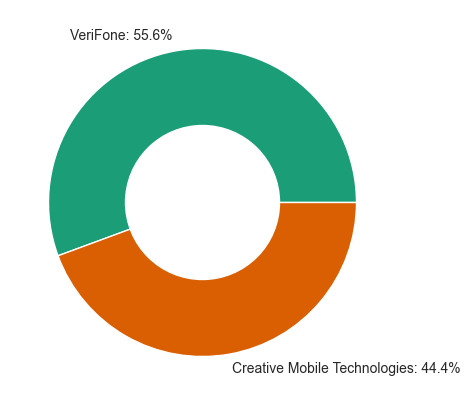

In [60]:
plt.figure(figsize= (15, 5))
plt.pie(df1["VendorID"].value_counts(), labels= ["VeriFone: 55.6%", "Creative Mobile Technologies: 44.4%"])

my_circle = plt.Circle( (0,0), 0.5, color= 'white')
p= plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

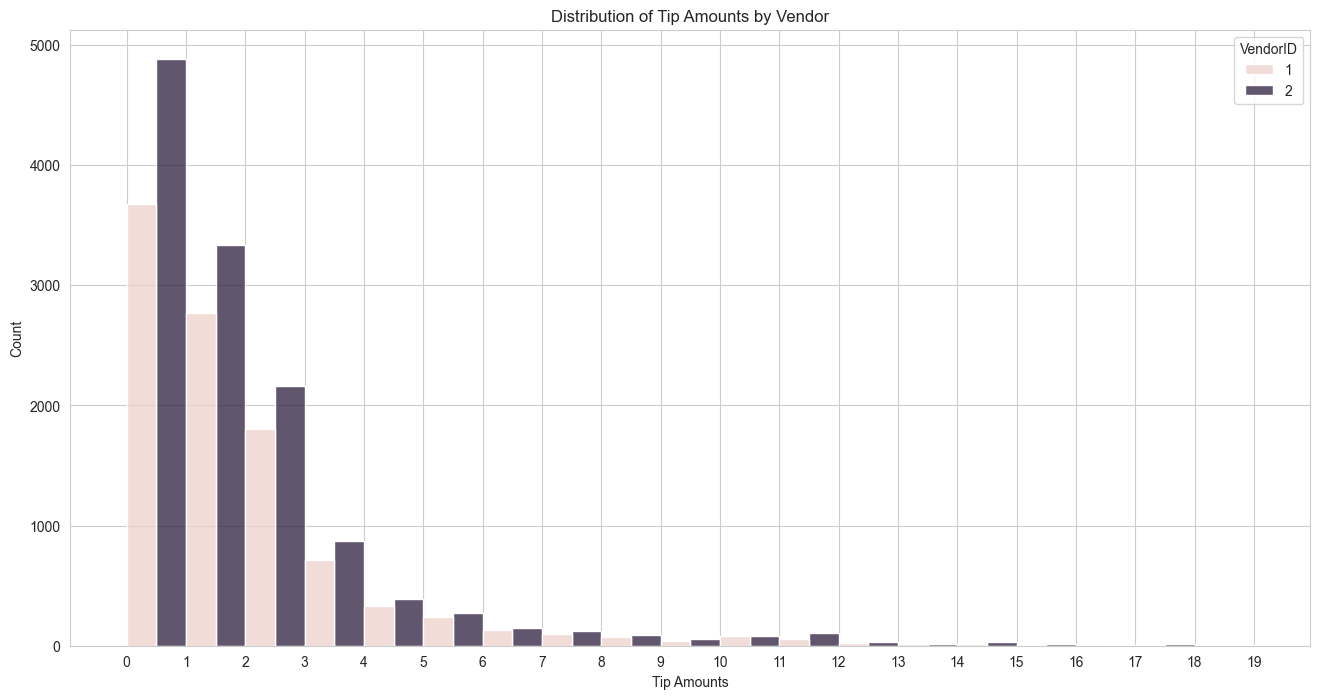

In [61]:
plt.figure(figsize = (16, 8))
ax= sns.histplot(data= df1, x= "tip_amount", bins= range(0, 20, 1), hue= "VendorID", multiple= "dodge")

ax.set_xticks(range(0, 20, 1))
ax.set_xticklabels(range(0, 20, 1))
plt.xlabel("Tip Amounts")
plt.title("Distribution of Tip Amounts by Vendor")
plt.show()

In [62]:
df_vendor = df1.groupby(["VendorID"])[["tip_amount", "total_amount"]].agg({"sum", "mean"})
df_vendor

tip_amount           total_amount           
                sum      mean          sum       mean
VendorID                                             
1          18362.12  1.822905    162838.95  16.165884
2          23163.78  1.834610    205116.65  16.245577

#### **Tips by Passenger Count**

In [63]:
round(df1["passenger_count"].value_counts(normalize= True), 3) * 100

passenger_count
1    71.1
2    14.6
5     5.0
3     4.2
6     3.1
4     2.0
Name: proportion, dtype: float64

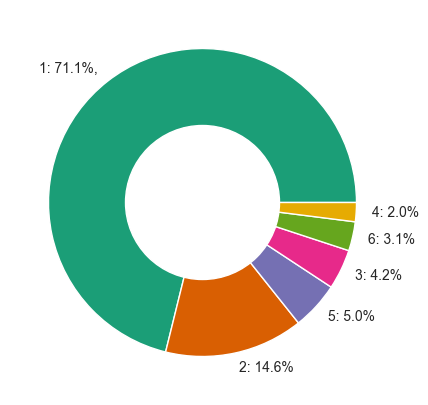

In [64]:
plt.figure(figsize= (15, 5))
plt.pie(df1["passenger_count"].value_counts(), labels= ["1: 71.1%,", "2: 14.6%", "5: 5.0%", "3: 4.2%", "6: 3.1%", "4: 2.0%"])

my_circle = plt.Circle( (0,0), 0.5, color= 'white')
p= plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [65]:
mean_tips_by_pass = df1.groupby(["passenger_count"])[["tip_amount"]].mean().reset_index().rename(columns= {"tip_amount": "average_tip"})
mean_tips_by_pass

,passenger_count,average_tip
0,1,1.840559
1,2,1.856378
2,3,1.716768
3,4,1.530264
4,5,1.873185
5,6,1.720260


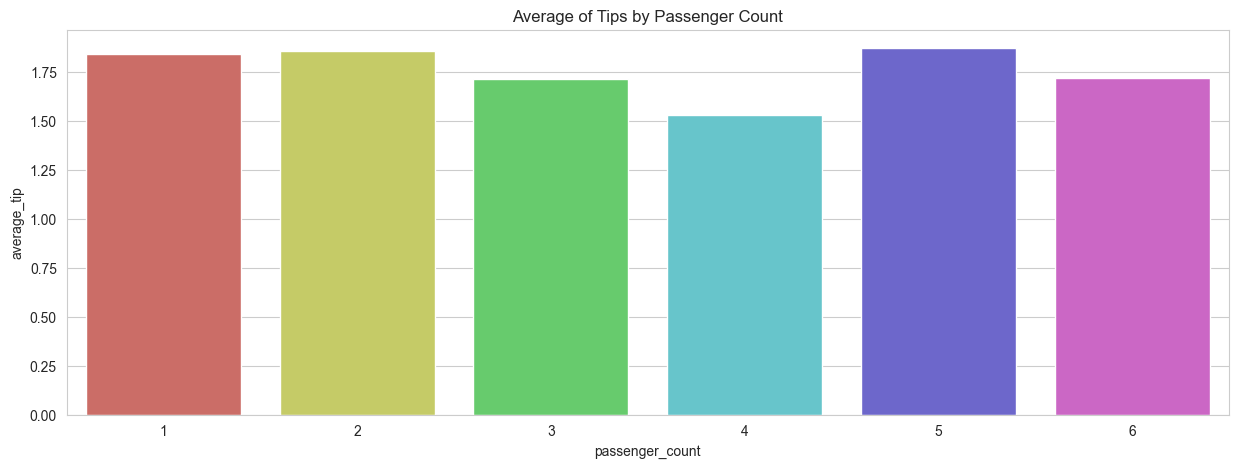

In [66]:
plt.figure(figsize = (15, 5))
sns.barplot(data= mean_tips_by_pass, x= "passenger_count", y= "average_tip", palette= "hls")
plt.title("Average of Tips by Passenger Count")
plt.show()

#### **Tips by Payment Types**

In [67]:
round(df1["payment_type"].value_counts(normalize= True), 3) * 100

payment_type
1    67.2
2    32.0
3     0.5
4     0.2
Name: proportion, dtype: float64

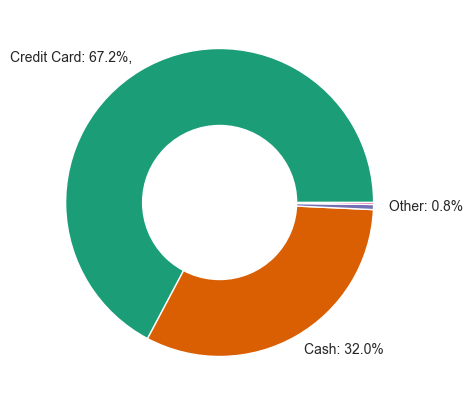

In [68]:
plt.figure(figsize= (15, 5))
plt.pie(df1["payment_type"].value_counts(), labels= ["Credit Card: 67.2%,", "Cash: 32.0%", "Other: 0.8%", ""])

my_circle = plt.Circle( (0,0), 0.5, color= 'white')
p= plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [69]:
mean_tips_by_pay = df1.groupby(["payment_type"])[["tip_amount"]].mean().reset_index().rename(columns= {"tip_amount": "average_tip"})
mean_tips_by_pay

,payment_type,average_tip
0,1,2.720334
1,2,0.000000
2,3,0.000000
3,4,0.000000


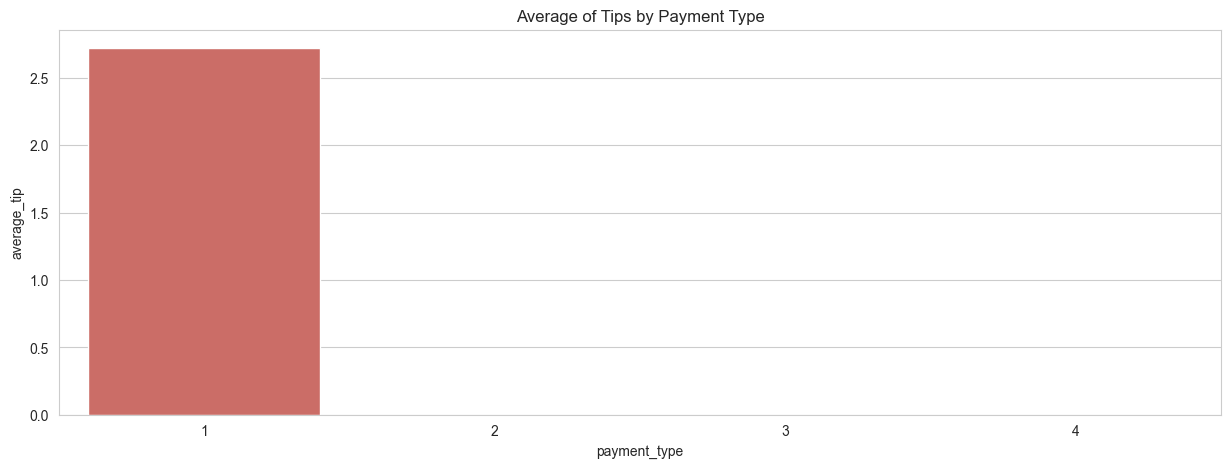

In [70]:
plt.figure(figsize = (15, 5))
sns.barplot(data= mean_tips_by_pay, x= "payment_type", y= "average_tip", palette= "hls")
plt.title("Average of Tips by Payment Type")
plt.show()

### Conduct an A/B Test with a two-sample t-test

In [71]:
df1.groupby(["payment_type"])["fare_amount"].agg({"mean", "median"})

,mean,median
payment_type,,
1,13.330766,9.5
2,12.141302,9.0
3,12.367934,7.0
4,12.989130,8.5


Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger 
fare amount than customers who pay in cash. However, this difference might arise from rando 
sampling, rather than being a true difference in fare amount. To assess whether the difference  s
statistically significanwe'llyou conduct a hypothesis test.

In [72]:
credit_card = df1[df1["payment_type"] == 1]["fare_amount"]
cash = df1[df1["payment_type"] == 2]["fare_amount"]
print(len(credit_card))
print(len(cash))

15265
7267


Considering our hypotheses for this project as listed below:

1. H0: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

2. HA: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

**We choose 5% as the significance level and proceed with a two-sample t-test.**

In [73]:
stats.ttest_ind(a= credit_card, b= cash, equal_var= False)

TtestResult(statistic=7.928029528935512, pvalue=2.381707989138683e-15, df=15078.192451526904)

**Since the p-value < significance level,** then we reject the null hypothesis and accept the alternative hypothesis stating that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

### Scatter plots

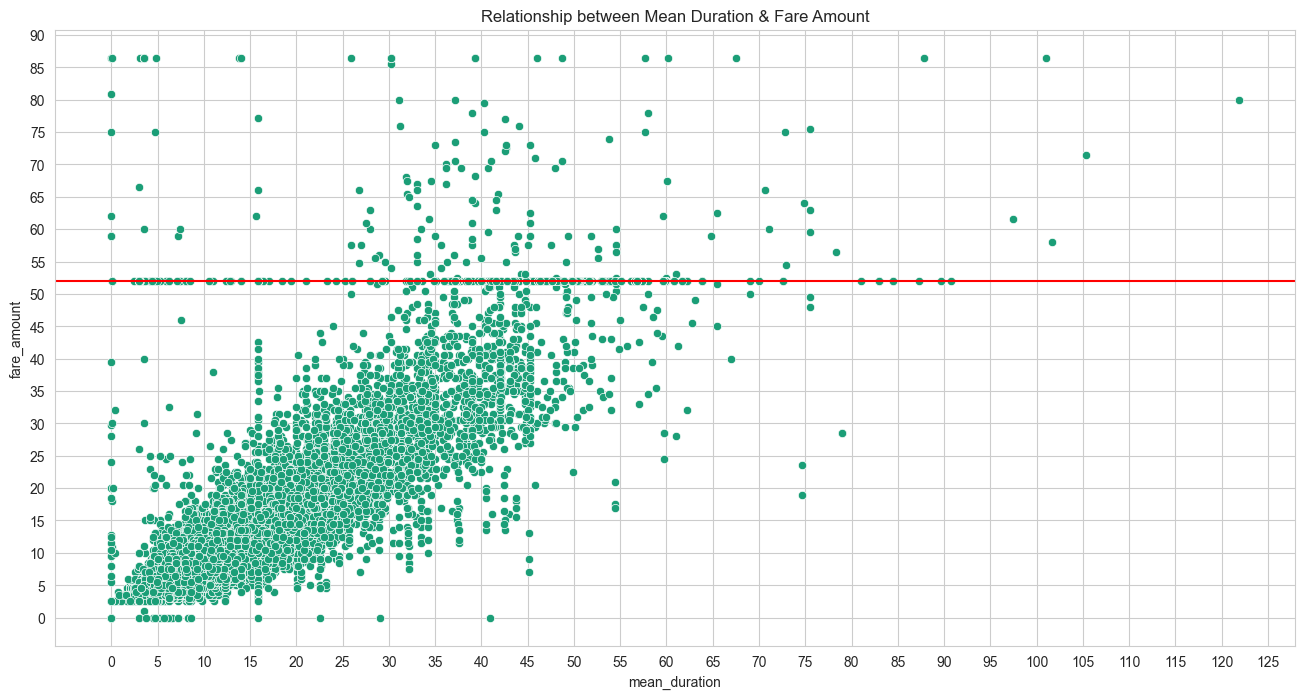

In [74]:
plt.figure(figsize= (16, 8))
sns.scatterplot(data= df1, x= "mean_duration", y= "fare_amount")
plt.axhline(52, color= "red")

plt.xticks(range(0, 126, 5))
plt.yticks(range(0, 91, 5))
plt.title("Relationship between Mean Duration & Fare Amount")
plt.show()

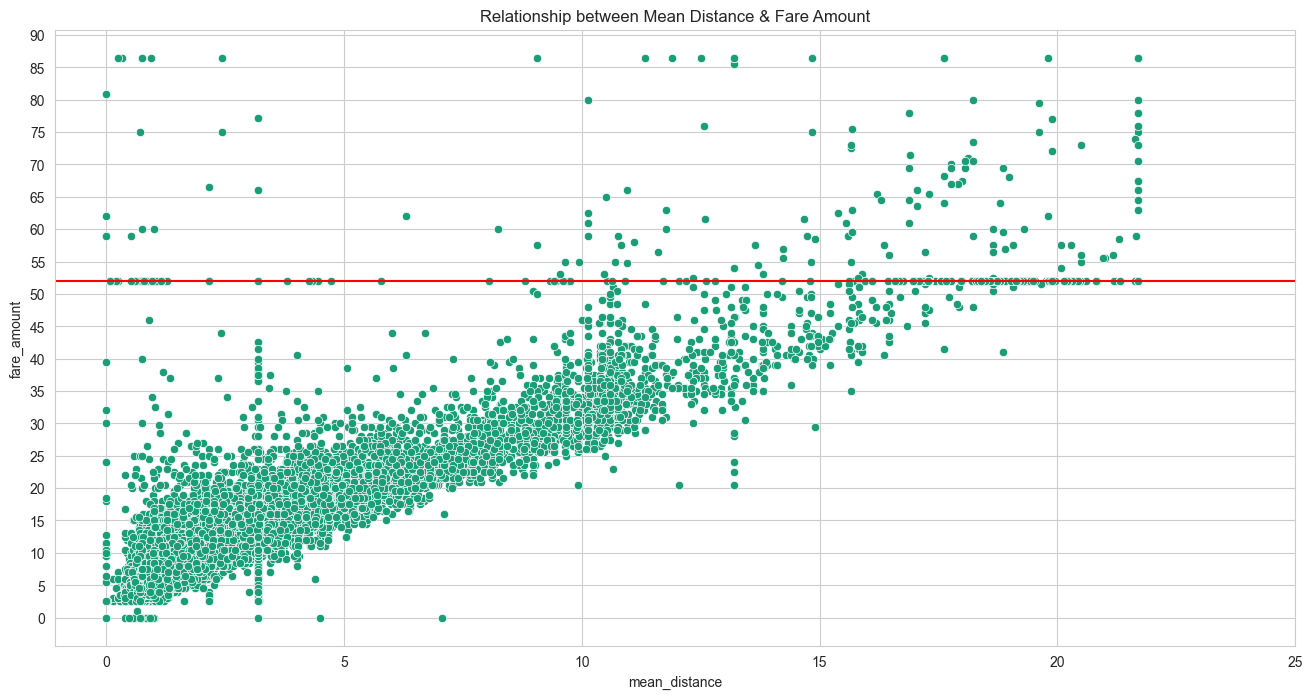

In [75]:
plt.figure(figsize= (16, 8))
sns.scatterplot(data= df1, x= "mean_distance", y= "fare_amount")
plt.axhline(52, color= "red")

plt.xticks(range(0, 26, 5))
plt.yticks(range(0, 91, 5))
plt.title("Relationship between Mean Distance & Fare Amount")
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal line around fare amount of 52 dollars?

In [76]:
df1[df1["fare_amount"] > 50]["fare_amount"].value_counts().head(3)

fare_amount
52.0    514
86.5     23
50.5      9
Name: count, dtype: int64

In [77]:
# Set pandas to display all columns
pd.set_option("display.max_columns", None)
df1[df1["fare_amount"] == 52].head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,day,month,rush_hour,passenger_count,trip_distance,trip_duration,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,pickup_dropoff,mean_distance,mean_duration,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
11,2,2017-03-05 19:15:00,2017-03-05 19:52:00,sunday,march,0,2,18.90,37.000000,2,N,236,132,236 >> 132,19.21,46.10,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92
110,1,2017-06-03 14:24:00,2017-06-03 15:31:00,saturday,june,0,1,18.00,67.000000,2,N,132,163,132 >> 163,19.13,53.07,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80
161,2,2017-11-11 20:16:00,2017-11-11 20:17:00,saturday,november,0,1,0.23,1.000000,2,N,132,132,132 >> 132,2.16,3.02,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80
247,2,2017-12-06 23:37:00,2017-12-07 00:06:00,wednesday,december,0,1,18.93,29.000000,2,N,132,79,132 >> 79,19.43,47.16,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80
379,2,2017-09-24 23:45:45,2017-09-25 00:15:14,sunday,september,0,1,17.99,29.483333,2,N,132,234,132 >> 234,17.65,49.78,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
388,1,2017-02-28 18:30:05,2017-02-28 19:09:55,tuesday,february,1,1,18.40,39.833333,2,N,132,48,132 >> 48,18.52,59.85,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84
406,2,2017-06-05 12:51:00,2017-06-05 13:07:00,monday,june,0,1,4.73,16.000000,2,N,228,88,228 >> 88,4.73,16.00,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
449,2,2017-08-03 22:47:00,2017-08-03 23:32:00,thursday,august,0,2,18.21,45.000000,2,N,132,48,132 >> 48,18.52,59.85,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
468,2,2017-09-26 13:48:26,2017-09-26 14:31:17,tuesday,september,0,1,17.27,42.850000,2,N,186,132,186 >> 132,17.10,42.79,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
520,2,2017-04-23 21:34:48,2017-04-23 22:46:23,sunday,april,0,6,18.34,71.583333,2,N,132,148,132 >> 148,17.99,46.37,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80


It seems that almost all of the trips in the first 30 rows where the fare amount was \$52 either begin or end at location 132, and all of them have a `RatecodeID` of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $5.76 and \\$5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

### Isolate modelling variables

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   day                    22699 non-null  object        
 4   month                  22699 non-null  object        
 5   rush_hour              22699 non-null  int64         
 6   passenger_count        22699 non-null  int64         
 7   trip_distance          22699 non-null  float64       
 8   trip_duration          22699 non-null  float64       
 9   RatecodeID             22699 non-null  int64         
 10  store_and_fwd_flag     22699 non-null  object        
 11  PULocationID           22699 non-null  int64         
 12  DOLocationID           22699 non-null  int64         
 13  p

In [79]:
df2 = df1.copy()

df2 = df2.drop(["tpep_pickup_datetime", "tpep_dropoff_datetime", "day", "month", "trip_distance", "trip_duration",\
                "store_and_fwd_flag", "PULocationID", "DOLocationID", "pickup_dropoff", "payment_type", "RatecodeID",\
                "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount"], axis= 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   rush_hour        22699 non-null  int64  
 2   passenger_count  22699 non-null  int64  
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   fare_amount      22699 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Pair plot

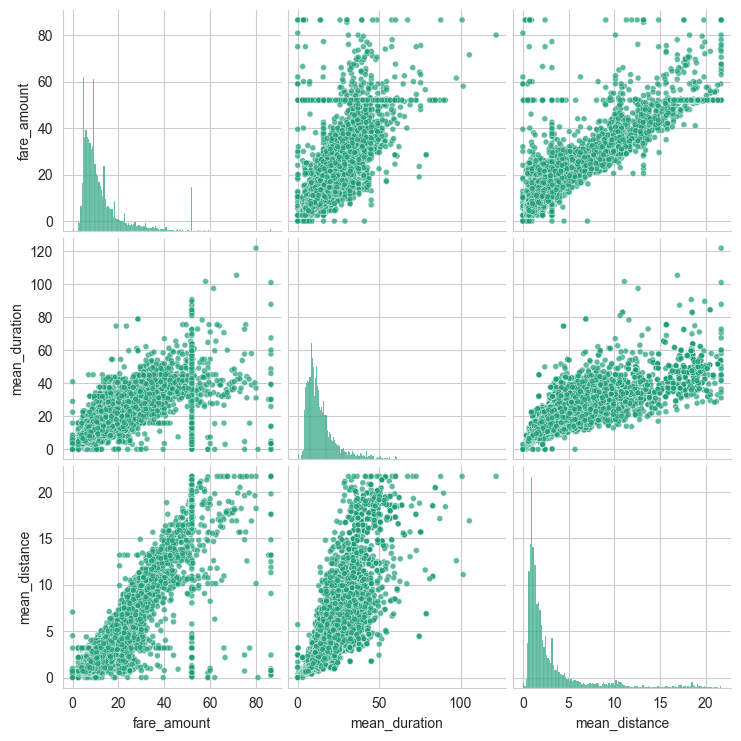

In [80]:
sns.pairplot(data= df2[["fare_amount", "mean_duration", "mean_distance"]], plot_kws= {"alpha": 0.7, "size": 0.7})
plt.show()

### Identify correlations

In [81]:
# Correlation matrix to help determine most correlated variables
df2.corr(method= "pearson")

,VendorID,rush_hour,passenger_count,mean_distance,mean_duration,fare_amount
VendorID,1.000000,-0.000752,0.265464,0.003876,0.002441,0.001379
rush_hour,-0.000752,1.000000,-0.024259,-0.047741,-0.026922,-0.025329
passenger_count,0.265464,-0.024259,1.000000,0.013635,0.015732,0.015012
mean_distance,0.003876,-0.047741,0.013635,1.000000,0.869964,0.902685
mean_duration,0.002441,-0.026922,0.015732,0.869964,1.000000,0.840942
fare_amount,0.001379,-0.025329,0.015012,0.902685,0.840942,1.000000


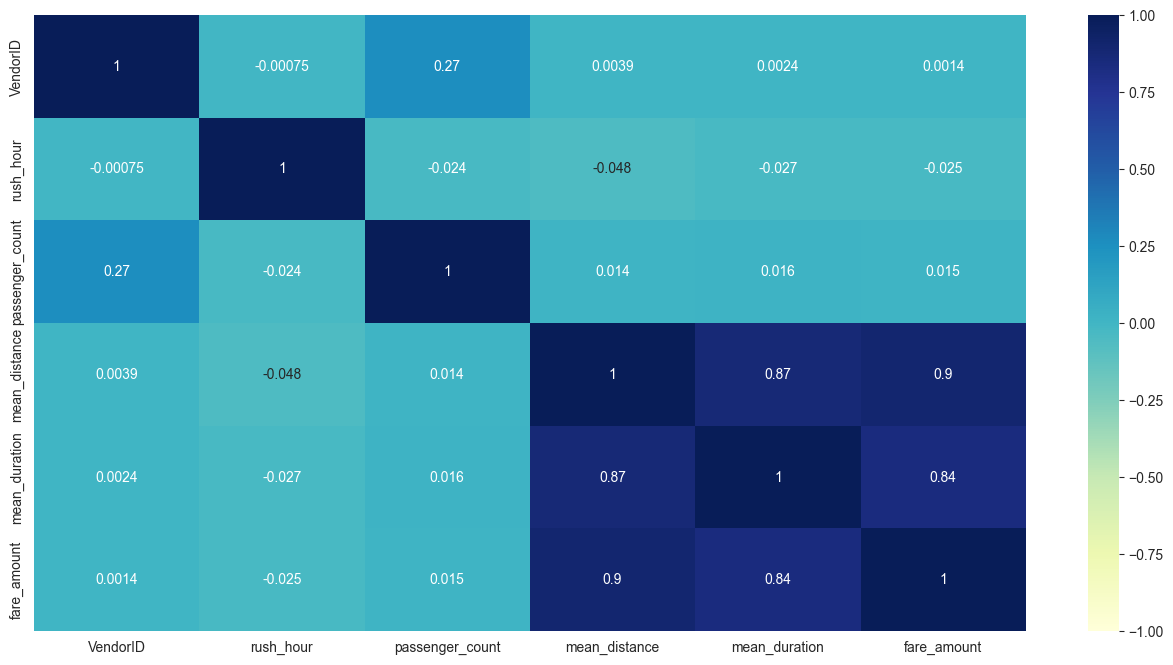

In [82]:
# Create correlation heatmap
plt.figure(figsize= (16, 8))
sns.heatmap(data= df2.corr(method= "pearson"), vmin= -1, vmax= 1, annot= True, cmap= "YlGnBu")
plt.show()

# paCe: Construct Stage

## Step 4. Model Building

### Split data into outcome variable and features

In [83]:
# Remove the target column from the features
X = df2.drop(columns='fare_amount')

# Set y variable
y = df2[["fare_amount"]]

# Display first few rows
X.head(3)

,VendorID,rush_hour,passenger_count,mean_distance,mean_duration
0,2,0,6,3.52,22.88
1,1,0,1,3.11,24.29
2,1,1,1,0.88,7.26


### Dummy encode categorical vendorID

In [84]:
# Convert VendorID to string
X["VendorID"] = X["VendorID"].astype("str")

# Get dummies
X = pd.get_dummies(X, drop_first= False)
X.head(3)

,rush_hour,passenger_count,mean_distance,mean_duration,VendorID_1,VendorID_2
0,0,6,3.52,22.88,False,True
1,0,1,3.11,24.29,True,False
2,1,1,0.88,7.26,True,False


### Split data into training and testing sets

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Modelling Approach [A]: Multiple Linear Regression

### Standardize the data

In [86]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print("X_train_scaled:\n", X_train_scaled)

X_train_scaled:
 [[-0.77153979 -0.50468931  0.88394718  0.16609516 -0.89286563  0.89286563]
 [ 1.29610943 -0.50468931 -0.60457634 -0.70337029 -0.89286563  0.89286563]
 [-0.77153979  0.27243722 -0.48265917 -0.57192814  1.11998936 -1.11998936]
 ...
 [-0.77153979 -0.50468931 -0.45430634 -0.66637176  1.11998936 -1.11998936]
 [ 1.29610943 -0.50468931 -0.59607049 -0.84844347  1.11998936 -1.11998936]
 [-0.77153979  1.82669027  0.84992379  1.11734684 -0.89286563  0.89286563]]


### Fit the model

In [87]:
# Fit your model to the training data
mlr = LinearRegression(n_jobs= -1)
mlr.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=-1)

### Evaluate the model

In [88]:
def evaluate_regressor(actual, predicted):
    print(f"R^2: {round(r2_score(actual, predicted), 2)}")
    print(f"MAE: {round(mean_absolute_error(actual, predicted), 2)}")
    print(f"MSE: {round(mean_squared_error(actual, predicted), 2)}")
    print(f"RMSE: {round(np.sqrt(mean_squared_error(actual, predicted)), 2)}")

In [89]:
y_pred_train_mlr = mlr.predict(X_train_scaled)

evaluate_regressor(y_train, y_pred_train_mlr)

R^2: 0.82
MAE: 2.25
MSE: 20.95
RMSE: 4.58


In [90]:
X_test_scaled = scaler.transform(X_test)

y_pred_test_mlr = mlr.predict(X_test_scaled)

evaluate_regressor(y_test, y_pred_test_mlr)

R^2: 0.85
MAE: 2.19
MSE: 16.56
RMSE: 4.07


### Coefficients for multiple linear regression

In [91]:
print("Coefficients:\n", mlr.coef_)

Coefficients:
 [[ 1.40972853e-01  2.84896083e-02  7.59366967e+00  2.46856907e+00
  -2.19545604e+13 -2.19545604e+13]]


In [92]:
coefficients = round(pd.DataFrame(data= mlr.coef_, columns= X.columns) * 100, 4)
coefficients

,rush_hour,passenger_count,mean_distance,mean_duration,VendorID_1,VendorID_2
0,14.0973,2.849,759.367,246.8569,-2.195456e+15,-2.195456e+15


These coefficients represent the relative increase in fare_amount for every unit increased in standard deviation of these variables. To simplify the interpretation, let's calculate the standard deviation of the most effective variables:

In [93]:
print(X_train['mean_distance'].std())

print(7.5937 / X_train['mean_distance'].std())

3.52708203496952
2.15296948716012


Now you can make a more intuitive interpretation: for every 3.53 miles traveled, the fare increased by a mean of \\$7.59. Or, for every 1 mile traveled, the fare increased by a mean of \\$2.15.

In [94]:
print(X_train['mean_duration'].std())

print(2.4686 / X_train['mean_duration'].std())

10.270961194893056
0.24034751501421708


For every 10.27 minutes traveled, the fare increased by a mean of \\$2.47. Or, for every 1 minute traveled, the fare increased by a mean of \\$0.24.

## Modelling Approach [B]: Random Forest Regressor

In [95]:
ranfor_reg = RandomForestRegressor(random_state= 17)

cv_params = {"max_depth": [4, 6, 8, 10], "min_samples_leaf": [1, 2, 3, 4], "n_estimators": [100, 150, 200, 250]}

scoring = ["explained_variance", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"]

ranfor_cv = GridSearchCV(estimator= ranfor_reg, param_grid= cv_params, scoring= scoring, cv= 5, refit= "explained_variance", n_jobs= -1, verbose= 2)

In [96]:
%%time

ranfor_cv.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
CPU times: total: 4.48 s
Wall time: 3min 7s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250]},
             refit='explained_variance',
             scoring=['explained_variance', 'neg_mean_absolute_error',
                      'neg_mean_squared_error', 'neg_root_mean_squared_error'],
             verbose=2)

In [97]:
ranfor_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 200}

In [98]:
ranfor_cv.best_score_

0.8391621789484782

### Fit the model

In [99]:
ranfor_reg = RandomForestRegressor(n_estimators= 200, criterion= 'squared_error', max_depth= 8, min_samples_leaf= 1, n_jobs= -1, verbose= 1, random_state= 17)
ranfor_reg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished


RandomForestRegressor(max_depth=8, n_estimators=200, n_jobs=-1, random_state=17,
                      verbose=1)

### Evaluate the model

In [100]:
# Evaluate the model performance on the training data
y_pred_train_ranfor = ranfor_reg.predict(X_train)

evaluate_regressor(y_train, y_pred_train_ranfor)

R^2: 0.88
MAE: 2.05
MSE: 14.45
RMSE: 3.8


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [101]:
# Evaluate the model performance on the testing data
y_pred_test_ranfor = ranfor_reg.predict(X_test)

evaluate_regressor(y_test, y_pred_test_ranfor)

R^2: 0.86
MAE: 2.13
MSE: 15.41
RMSE: 3.93


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


## Modelling Approach [C]: Extreme Gradient Boost Regressor

In [102]:
xgboost_reg = XGBRegressor(objective= 'reg:squarederror', random_state= 17)

cv_params = {"max_depth": [4, 6, 8, 10], "min_child_weight": [1, 2, 3, 4], "n_estimators": [100, 150, 200, 250], "learning_rate": [0.05, 0.1, 0.2]}

scoring = ["explained_variance", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"]

xgboost_cv = GridSearchCV(estimator= xgboost_reg, param_grid= cv_params, scoring= scoring, cv= 5, refit= "explained_variance", n_jobs= -1, verbose= 2)

In [103]:
%%time

xgboost_cv.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
CPU times: total: 8.98 s
Wall time: 1min 31s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=17, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 6, 8, 10],
                         'min_child_weight': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250]},
             refit='explained_variance',
             scoring=['explained_variance', 'neg_mean_absolute_error',
                      'neg_mean_squared_error', 'neg_root_mean_squared_error'],
             verbose=2)

In [104]:
xgboost_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 250}

In [105]:
xgboost_cv.best_score_

0.8364500917599068

### Fit the model

In [106]:
xgboost_reg = XGBRegressor(n_estimators= 250, learning_rate= 0.05, max_depth= 4, min_child_weight= 3, n_jobs= -1, verbose= 1, random_state= 17)
xgboost_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=-1,
             num_parallel_tree=None, random_state=17, ...)

### Evaluate the model

In [107]:
# Evaluate the model performance on the training data
y_pred_train_xgb = xgboost_reg.predict(X_train)

evaluate_regressor(y_train, y_pred_train_xgb)

R^2: 0.86
MAE: 2.12
MSE: 16.2
RMSE: 4.03


In [108]:
# Evaluate the model performance on the testing data
y_pred_test_xgb = xgboost_reg.predict(X_test)

evaluate_regressor(y_test, y_pred_test_xgb)

R^2: 0.86
MAE: 2.12
MSE: 15.55
RMSE: 3.94


# pacE: Execute Stage

## Step 5. Results and Evaluation

### Comparing models

In [109]:
data = {"Model": ["Linear Regression", "Linear Regression", "Linear Regression", "Linear Regression", "Random_Forest", "Random_Forest", "Random_Forest", "Random_Forest", "XGBoost", "XGBoost", "XGBoost", "XGBoost"],\
       "Metric": ["R^2", "MAE", "MSE", "RMSE", "R^2", "MAE", "MSE", "RMSE", "R^2", "MAE", "MSE", "RMSE"],\
       "Score": [0.85, 2.19, 16.56, 4.07, 0.87, 2.13, 15.32, 3.91, 0.86, 2.12, 15.55, 3.94]}

comparing_models_ = pd.DataFrame(data)
comparing_models_

,Model,Metric,Score
0,Linear Regression,R^2,0.85
1,Linear Regression,MAE,2.19
2,Linear Regression,MSE,16.56
3,Linear Regression,RMSE,4.07
4,Random_Forest,R^2,0.87
5,Random_Forest,MAE,2.13
6,Random_Forest,MSE,15.32
7,Random_Forest,RMSE,3.91
8,XGBoost,R^2,0.86
9,XGBoost,MAE,2.12


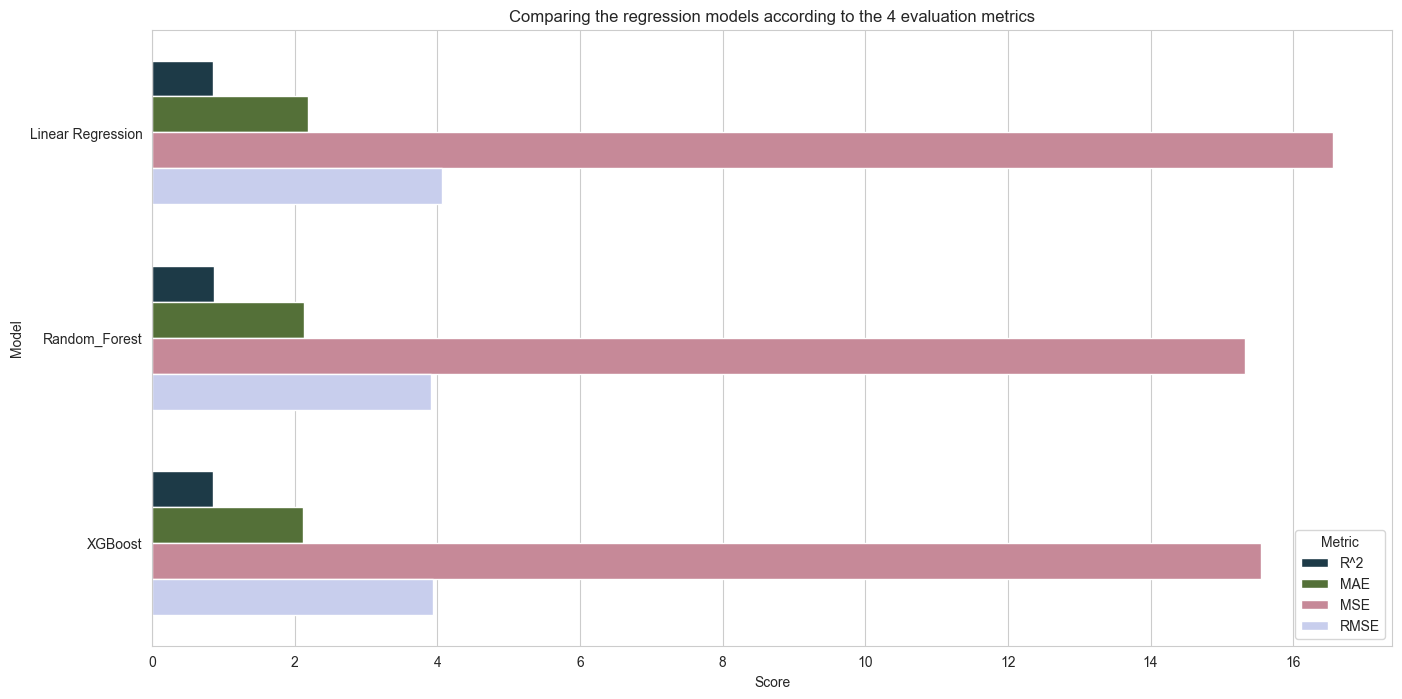

In [110]:
plt.figure( figsize= (16, 8))
fig = sns.barplot(data= comparing_models_, x= "Score", y= "Model", orient= "horizontal", hue= "Metric", palette= "cubehelix", width= 0.7, dodge= True)
fig.set_title("Comparing the regression models according to the 4 evaluation metrics")
plt.show()

**We could observe that the Random Forest Model performs the best based on the all metrics except for the mean absolute error.**

### Random forest model results

In [111]:
# Create a `results` dataframe
results = pd.DataFrame(data= {"actual": y_test["fare_amount"], "predicted": y_pred_test_ranfor.ravel()})
results.head(5)

,actual,predicted
5818,14.0,12.107306
18134,28.0,16.999474
4655,5.5,6.541329
7378,15.5,15.847178
13914,9.5,10.174875


In [112]:
results["residual"] = results["actual"] - results["predicted"]
results.head(5)

,actual,predicted,residual
5818,14.0,12.107306,1.892694
18134,28.0,16.999474,11.000526
4655,5.5,6.541329,-1.041329
7378,15.5,15.847178,-0.347178
13914,9.5,10.174875,-0.674875


### Visualize random forest model results

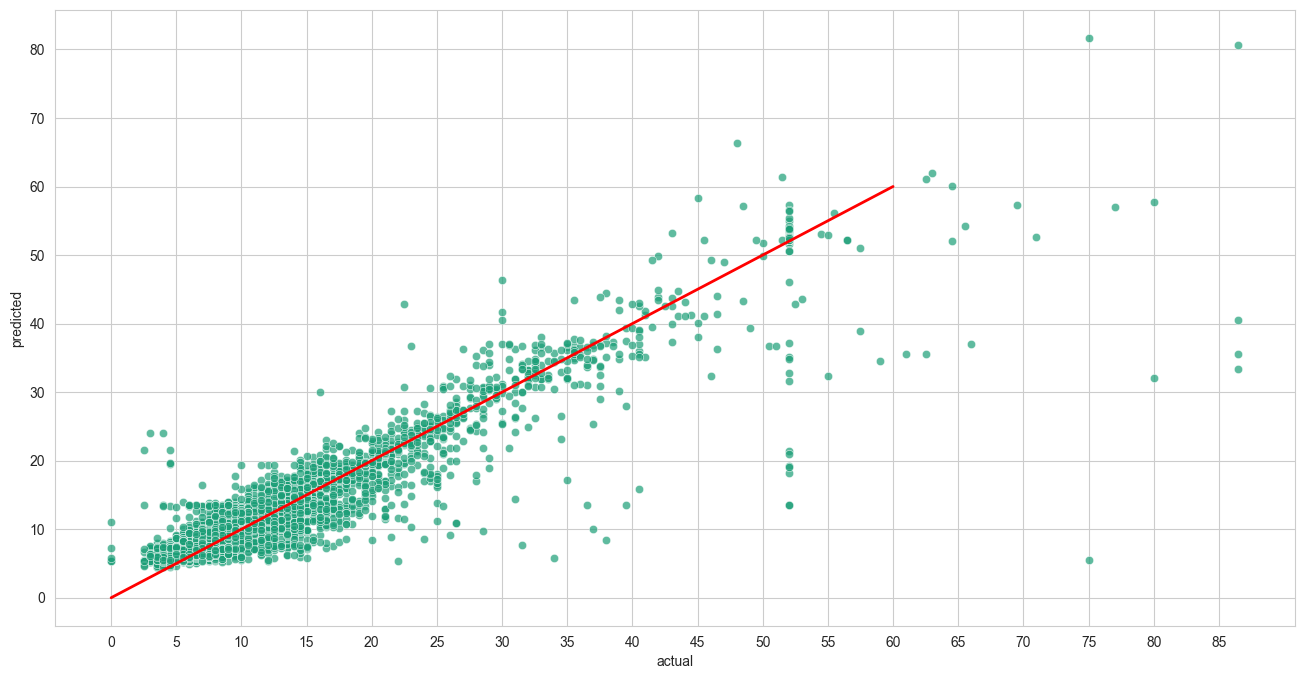

In [113]:
# Create a scatterplot to visualize `predicted` over `actual`
plt.figure(figsize= (16, 8))
sns.scatterplot(data= results, x= "actual", y= "predicted", alpha= 0.7)
plt.plot([0, 60], [0, 60], c= "red", linewidth= "2")
plt.xticks(range(0, 86, 5))
plt.show()

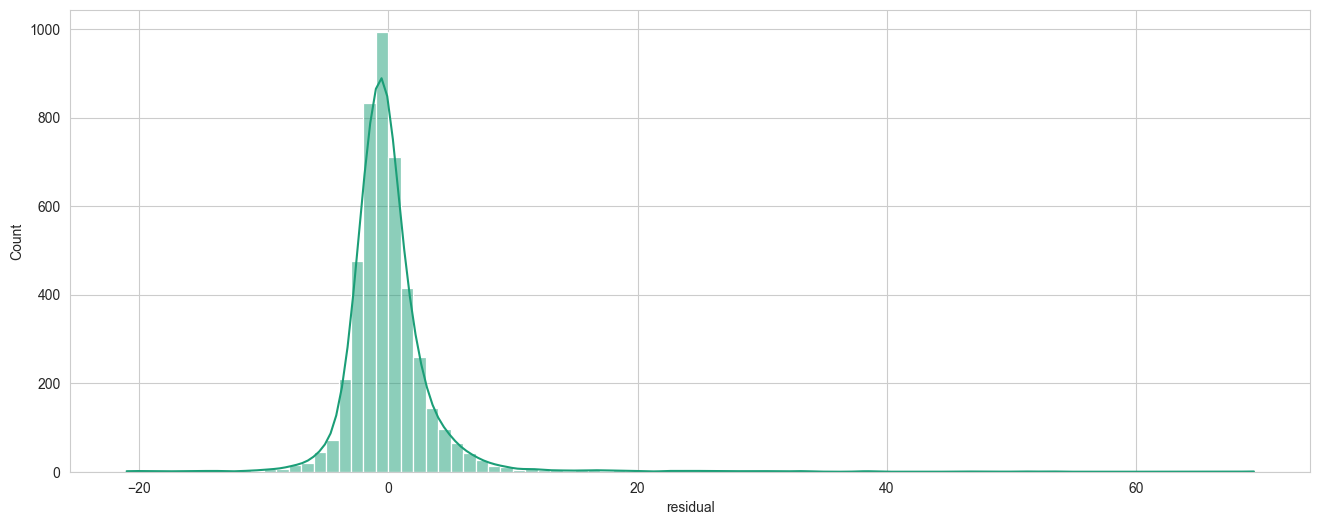

In [114]:
# Visualize the distribution of the `residuals`
plt.figure(figsize= (16, 6))
sns.histplot(data= results, x= "residual", kde= True, bins= np.arange(-20, 20, 1))
plt.show()

In [115]:
# Calculate residual mean
print("Residual Mean =", round(results["residual"].mean(), 4))

Residual Mean = 0.0253


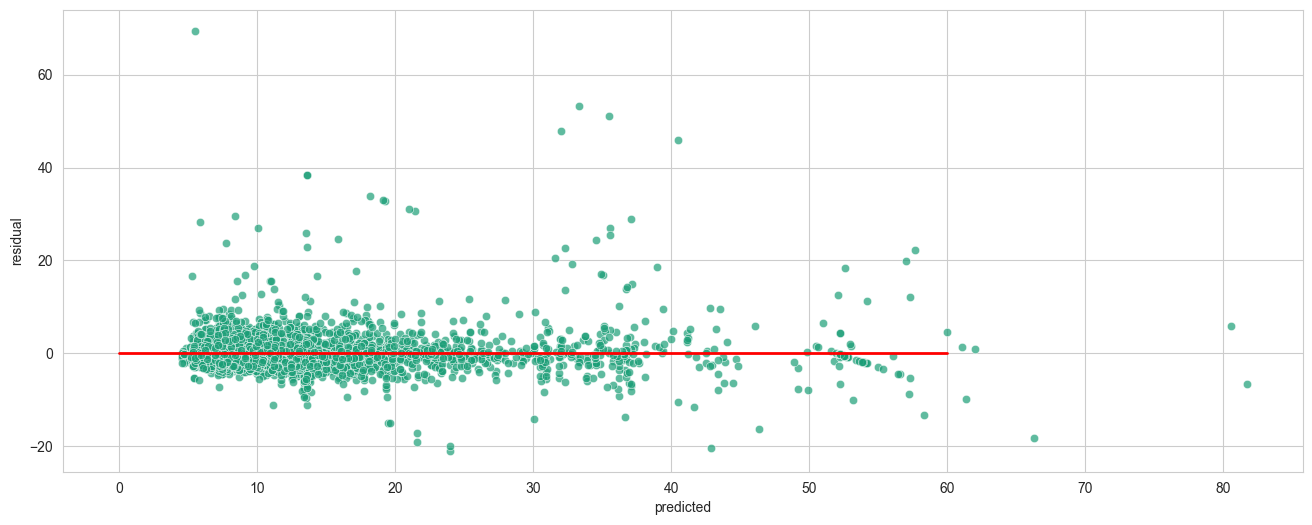

In [116]:
# Create a scatterplot of `residuals` over `predicted`
plt.figure(figsize= (16, 6))
sns.scatterplot(data= results, x= "predicted", y= "residual", alpha= 0.7)
plt.plot([0, 60], [0, 0], c= "red", linewidth= "2")
plt.show()

### Feature importance

In [117]:
feature_importances = ranfor_reg.feature_importances_
feature_importances

array([0.00325539, 0.00609513, 0.92578617, 0.06039367, 0.00206913,
       0.00240051])

In [119]:
forest_importances = pd.DataFrame(list(X.columns), columns= ["feature"])
forest_importances["importance"] = feature_importances * 100
forest_importances = forest_importances.sort_values(by="importance", ascending= False)
forest_importances

,feature,importance
2,mean_distance,92.578617
3,mean_duration,6.039367
1,passenger_count,0.609513
0,rush_hour,0.325539
5,VendorID_2,0.240051
4,VendorID_1,0.206913


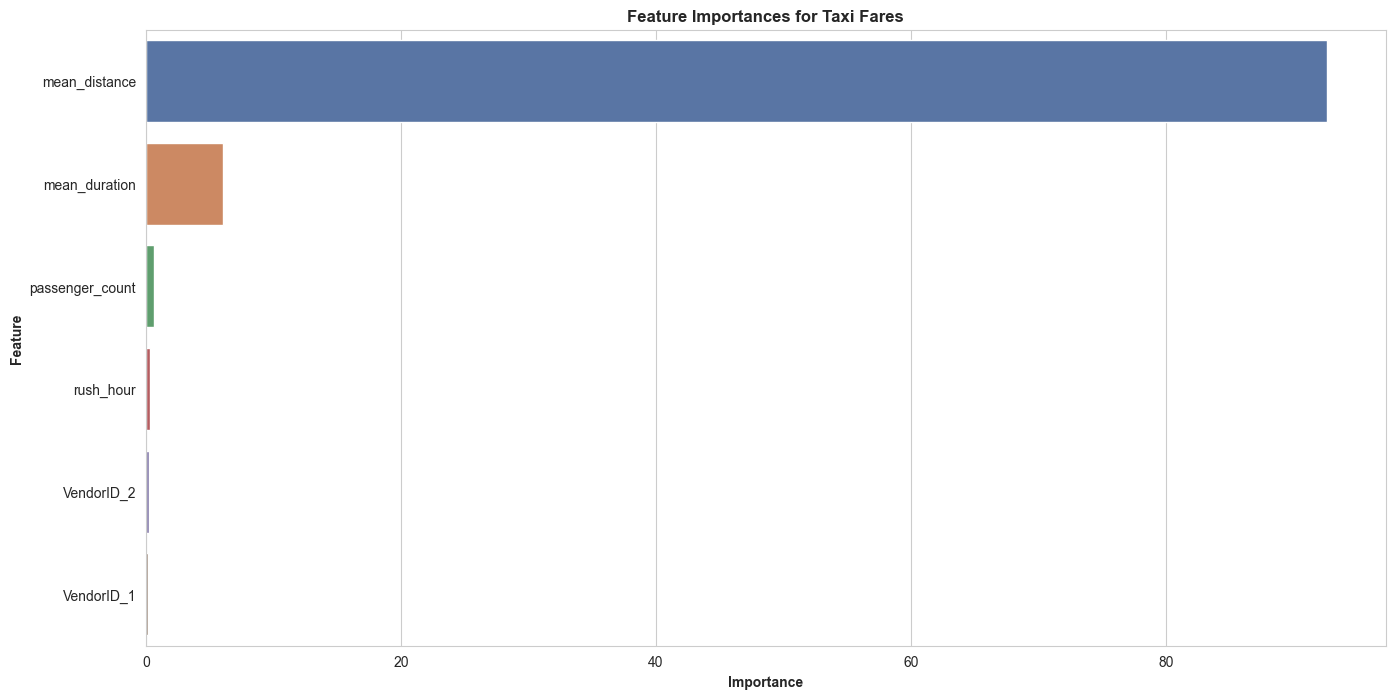

In [120]:
plt.figure(figsize= (16, 8))
sns.barplot(data= forest_importances, x= "importance", y= "feature", palette= "deep", orient= "h")
plt.title("Feature Importances for Taxi Fares", fontweight= "bold")
plt.ylabel("Feature", fontweight= "bold")
plt.xlabel("Importance", fontweight= "bold")
plt.show()

**From the above graph, we observe that the mean distance of the trip is the most influential factor in estimating the taxi fares in advance with relative importance of 92.58%. In the future, adding more information on a rider’s past behavior may also be beneficial in helping the stakeholder address their business problem.**